## Réseaux de neurones convolutionnels 

Maintenant qu'on a vu comment fonctionnait une convolution, on va entraîner nos premiers réseaux de neurones convolutionnels avec Keras



In [53]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout


Télécharger le dataset cifar 10 en utilisant le module datasets de keras

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 201s 1us/step


Récupérer le jeu de train et de test dans des variables train et test

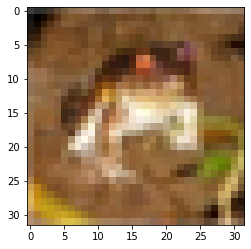

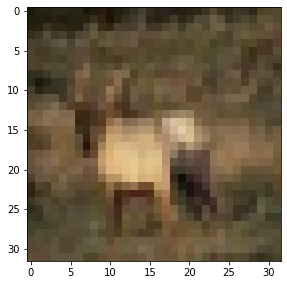

Afficher une ou deux images du jeu de train avec matplotlib 

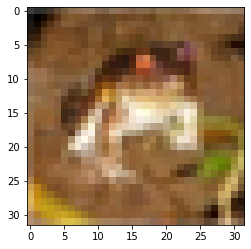

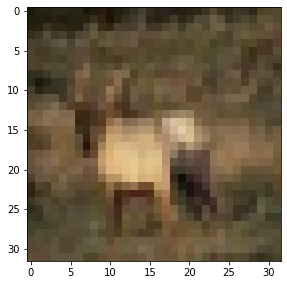

In [15]:
plt.imshow(X_train[0])
plt.show()

# Afficher deux images
plt.figure(figsize=(10, 5))

plt.imshow(X_train[0])

plt.subplot(1, 2, 2)
plt.imshow(X_train[3])

plt.show()

Si les données prennent des valeurs en 0 et 255 faire une normalisation des données

In [49]:

X_train = X_train / 255
X_test = X_test / 255


Créer un premier réseau de neurones convolutionnel à trois couches 
- Une couche convolutionnelle avec 32 neurones et une activation relu
- Une couche Dense ave 300 neurones relu
- Une couche Dense finale à spécifier vous même

Il faudra notamment penser à spécifier input_shape pour la première couche

In [50]:


# Initialize the model
model = Sequential()

# Add the first convolutional layer with 32 neurons and a ReLU activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a Flatten layer to flatten the 2D output from the previous layer
model.add(Flatten())

# Add the first dense layer with 300 neurons and a ReLU activation function
model.add(Dense(300, activation='relu'))

# Add the final dense layer with the number of neurons you want. You can specify any number you want, but for example purposes, let's say 10
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 flatten_9 (Flatten)         (None, 28800)             0         
                                                                 
 dense_24 (Dense)            (None, 300)               8640300   
                                                                 
 dense_25 (Dense)            (None, 10)                3010      
                                                                 
Total params: 8,644,206
Trainable params: 8,644,206
Non-trainable params: 0
_________________________________________________________________


Compiler le modèle avec la bonne loss et l'optimizer sgd

In [51]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=512)


Epoch 1/10
98/98 [==============================] - 33s 317ms/step - loss: 1.9339 - accuracy: 0.3604 - val_loss: 1.5057 - val_accuracy: 0.4679
Epoch 2/10
98/98 [==============================] - 47s 479ms/step - loss: 1.3968 - accuracy: 0.5118 - val_loss: 1.3381 - val_accuracy: 0.5314
Epoch 3/10
98/98 [==============================] - 39s 396ms/step - loss: 1.2520 - accuracy: 0.5651 - val_loss: 1.2642 - val_accuracy: 0.5559
Epoch 4/10
98/98 [==============================] - 36s 362ms/step - loss: 1.1460 - accuracy: 0.6026 - val_loss: 1.2052 - val_accuracy: 0.5746
Epoch 5/10
98/98 [==============================] - 39s 396ms/step - loss: 1.0708 - accuracy: 0.6317 - val_loss: 1.1724 - val_accuracy: 0.5889
Epoch 6/10
98/98 [==============================] - 38s 391ms/step - loss: 0.9982 - accuracy: 0.6548 - val_loss: 1.1411 - val_accuracy: 0.5989
Epoch 7/10
98/98 [==============================] - 34s 343ms/step - loss: 0.9332 - accuracy: 0.6791 - val_loss: 1.1341 - val_accuracy: 0.6059

Entrainer le modèle sur les données de train. Vous pourrez utiliser l'argument validation_data pour mesurer également la performance sur les données de test. Spécifier l'argument metrics pour afficher l'accuracy également

In [28]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x15122c1f0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [2.5809433460235596,
   2.343986988067627,
   2.326040744781494,
   2.318957567214966,
   2.3154077529907227,
   2.309849262237549,
   2.306288242340088,
   2.302568197250366,
   2.2998173236846924,
   2.295849561691284],
  'accuracy': [0.10063999891281128,
   0.10124000161886215,
   0.1001800000667572,
   0.10153999924659729,
   0.10159999877214432,
   0.09826000034809113,
   0.10034000128507614,
   0.1021599993109703,
   0.1014999970793724,
   0.10220000147819519],
  'val_loss': [2.4173762798309326,
   2.4126975536346436,
   2.412933111190796,
   2.4156978130340576,
   2.415520668029785,
   2.419656991958618,
   2.4168262481689453,
   2.418147325515747,
   2.420973539352417,
   2.4185283184051514],
  'val_accuracy': [0.10010000318288803,
   0.10040000081062317,
   0.1005999967455864,
   0.10090000182390213,
   0.101300

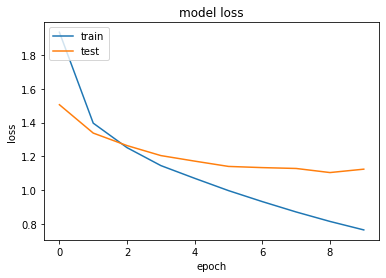

In [52]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test",  "accuracy"], loc="upper left")
plt.show()

In [30]:
# Initialize the model
model2 = Sequential()

# Add the first convolutional layer with 32 neurons and a ReLU activation function
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

model2.add(Conv2D(64, (3, 3), activation='relu'))

# Add a Flatten layer to flatten the 2D output from the previous layer
model2.add(Flatten())

# Add the first dense layer with 300 neurons and a ReLU activation function
model2.add(Dense(300, activation='relu'))

model2.add(Dense(100, activation='relu'))

# Add the final dense layer with the number of neurons you want. You can specify any number you want, but for example purposes, let's say 10
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_4 (Dense)             (None, 300)               15053100  
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 15,103,602
Trainable params: 15,103,602


In [31]:
history2 = model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
98/98 [==============================] - 20s 209ms/step - loss: 2.2958 - accuracy: 0.1006 - val_loss: 2.4246 - val_accuracy: 0.1010
Epoch 2/10
98/98 [==============================] - 21s 213ms/step - loss: 2.2948 - accuracy: 0.1009 - val_loss: 2.4187 - val_accuracy: 0.1014
Epoch 3/10
98/98 [==============================] - 21s 210ms/step - loss: 2.2953 - accuracy: 0.1011 - val_loss: 2.4227 - val_accuracy: 0.1008
Epoch 4/10
98/98 [==============================] - 20s 203ms/step - loss: 2.2944 - accuracy: 0.1026 - val_loss: 2.4260 - val_accuracy: 0.1005
Epoch 5/10
98/98 [==============================] - 21s 218ms/step - loss: 2.2948 - accuracy: 0.1026 - val_loss: 2.4276 - val_accuracy: 0.1013
Epoch 6/10
98/98 [==============================] - 21s 215ms/step - loss: 2.2939 - accuracy: 0.1021 - val_loss: 2.4250 - val_accuracy: 0.1009
Epoch 7/10
98/98 [==============================] - 21s 215ms/step - loss: 2.2940 - accuracy: 0.1028 - val_loss: 2.4268 - val_accuracy: 0.1011

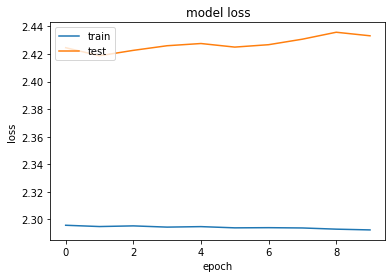

In [36]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test",  "accuracy"], loc="upper left")
plt.show()

Faire un second modèle avec au moins une couche convolutionnelle supplémentaire et une couche dense supplémentaire (sans trop d'excès). Réentraîner le modèle. Les performances sont elles meilleures ? 

## Le pooling 


Reprendre le modèle précédent et afficher le nombre de paramètre qu'il possède avec model.summary()

In [46]:
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

model3.add(MaxPooling2D(pool_size=(2, 2)))


model3.add(Conv2D(64, (3, 3), activation='relu'))

model3.add(Flatten())

model3.add(Dense(300, activation='relu'))

model3.add(Dense(100, activation='relu'))

model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 flatten_6 (Flatten)         (None, 10816)             0         
                                                                 
 dense_15 (Dense)            (None, 300)               3245100   
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                     

Faire un nouveau modèle qui reprend le modèle précédent en ajoutant une couche de pooling entre les deux couches convolutionnelles. Prendre pool size = (2, 2) 

Afficher à nouveau le nombre de paramètres du modèles. 



In [48]:
model4 = Sequential()

model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

model4.add(MaxPooling2D(pool_size=(4, 4)))


model4.add(Conv2D(64, (3, 3), activation='relu'))

model4.add(Flatten())

model4.add(Dense(300, activation='relu'))

model4.add(Dense(100, activation='relu'))

model4.add(Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 5, 5, 64)          18496     
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_21 (Dense)            (None, 300)               480300    
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                     

Faire pareil et prend pool size = (4, 4) et afficher à nouveau le nombre de paramètres du modèle. 

In [55]:

# Initialize the model
model = Sequential()

# Add the first convolutional layer with 32 neurons and a ReLU activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.05))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add a Flatten layer to flatten the 2D output from the previous layer
model.add(Flatten())

# Add the first dense layer with 300 neurons and a ReLU activation function
model.add(Dense(300, activation='relu'))

# Add the final dense layer with the number of neurons you want. You can specify any number you want, but for example purposes, let's say 10
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 flatten_11 (Flatten)        (None, 50176)             0         
                                                                 
 dense_28 (Dense)            (None, 300)               15053100  
                                                                 
 dense_29 (Dense)            (None, 10)                3010      
                                                                 
Total params: 15,075,502
Trainable params: 15,075,502

Pouvez vous expliquer pourquoi le nombre de paramètre a varié de la manière dont il l'a fait ? 

Réentraîner le modèle de la même manière que le modèle précédent. Les performances ont-elles évoluées ? Comment ? 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b859965-b858-4b8d-a841-009599aef86e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>